<a href="https://colab.research.google.com/github/JVR27XD/MobileSAM/blob/main/NanoSAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
# Preparar entorno
!git clone https://github.com/NVIDIA-AI-IOT/nanosam.git
%cd /content/nanosam

# Instalar dependencias básicas
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu121
!pip install opencv-python matplotlib


Cloning into 'nanosam'...
remote: Enumerating objects: 1309, done.
remote: Total 1309 (delta 0), reused 0 (delta 0), pack-reused 1309 (from 1)
Receiving objects: 100% (1309/1309), 97.56 MiB | 46.19 MiB/s, done.
Resolving deltas: 100% (749/749), done.
/content/nanosam
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 123.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
  Attempting uninstall: torchvision
 

In [2]:
# Descargar checkpoint oficial MobileSAM (TinyViT)
!mkdir -p assets
!wget https://github.com/ChaoningZhang/MobileSAM/blob/master/weights/mobile_sam.pt -O assets/mobile_sam.pt


--2025-06-20 18:56:25--  https://github.com/ChaoningZhang/MobileSAM/blob/master/weights/mobile_sam.pt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘assets/mobile_sam.pt’

assets/mobile_sam.p     [ <=>                ] 174.84K  --.-KB/s    in 0.04s   

2025-06-20 18:56:25 (4.75 MB/s) - ‘assets/mobile_sam.pt’ saved [179041]



In [7]:
# Instalar NanoSAM como paquete en modo "editable" (desarrollo)
%cd /content/nanosam
!pip install -e .


/content/nanosam
Obtaining file:///content/nanosam
  Preparing metadata (setup.py) ... done
  Running setup.py develop for nanosam


In [19]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121


In [20]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)


2.1.2+cu121
0.16.2+cu121


In [2]:
# Forzar numpy 1.26.4
!pip install numpy==1.26.4 --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 111.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


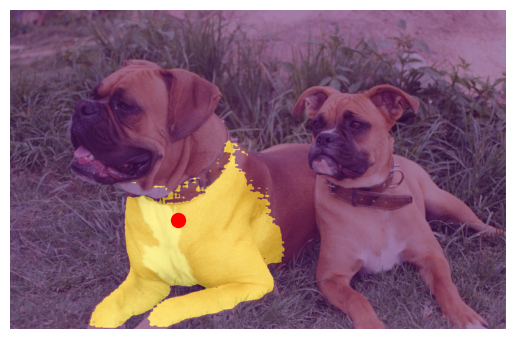

In [9]:
from nanosam.mobile_sam import SamPredictor, sam_model_registry
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar modelo
sam = sam_model_registry["vit_t"](
    checkpoint="/content/drive/MyDrive/Colab Notebooks/TFG/NanoSam/mobile_sam.pt"
)
predictor = SamPredictor(sam)

# Cargar imagen
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# NO convertir a float32 aquí

# Definir punto
input_point = np.array([[400, 500]])
input_label = np.array([1])

# Set image
predictor.set_image(image)

# Inferir
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

# Mostrar
plt.imshow(image.astype(np.uint8))
plt.imshow(masks[0], alpha=0.5)
plt.scatter(input_point[:, 0], input_point[:, 1], color="red", s=100)
plt.axis('off')
plt.show()

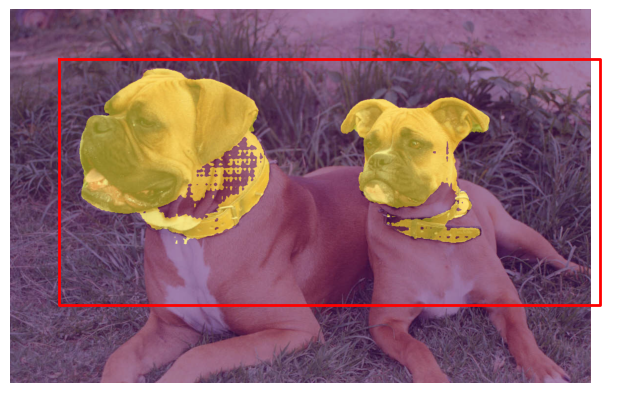

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta imagen en tu Drive
img_path = "/content/nanosam/assets/dogs.jpg"

# Cargar imagen
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir bounding box (x1, y1, x2, y2)
box = np.array([[100, 100, 1200, 600]])  # cambia estos valores según la imagen

# Set image
predictor.set_image(image)

# Inferir con bbox
masks, scores, logits = predictor.predict(
    box=box,
    multimask_output=True
)

# Mostrar imagen + máscara + bbox
plt.figure(figsize=(8, 8))
plt.imshow(image.astype(np.uint8))
plt.imshow(masks[0], alpha=0.5)

# Dibujar bounding box
x1, y1, x2, y2 = box[0]
plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], color="red", linewidth=2)

plt.axis('off')
plt.show()
